In [5]:
import matplotlib.pyplot as plt
import numpy as np
import omf
import omfvtk
import pandas as pd
import vtki
import PVGeo

In [6]:
import sys
# This makes the gdc19 package available
sys.path.append('../../')
import gdc19
gdc19.setup_adam()

ModuleNotFoundError: No module named 'appdirs'

In [ ]:
# GET THE WELLS DATABASE
WELLS = gdc19.load_well_db()

## Well 58-32 geophysical well log analysis

Lithology:
Basin Fill (0 to 1007 m), Granitoid (1007 to 2296.9 m)

Density of Granite: 2.75 g/cm3

Coordinates: x = 335380.766, y = 4263040.83, z = 1681.61659

Depth: 2296.9 m

In [3]:
well_log = pd.read_csv(gdc19.get_well_path('58-32_main_geophysical_well_log.csv'))

x_location = []
y_location = []
elevation = []
DEPTH = well_log['Depth (m)'].values

for i in range (0, len(well_log.index)):
    x = 335380.766
    y = 4263040.83
    z = 1681.61659 - DEPTH[i]
    x_location.append(x)
    y_location.append(y)
    elevation.append(z)
    
well_log = well_log.assign(x=pd.Series(x_location).values)
well_log = well_log.assign(y=pd.Series(y_location).values)
well_log = well_log.assign(z=pd.Series(elevation).values)
well_log.head()

NameError: name 'gdc19' is not defined

In [4]:
# move XYZ colums to front of table
spac = well_log[['x', 'y', 'z']]
well_poly = PVGeo.pointsToPolyData(spac)
for k, v in well_log.to_dict(orient='list').items():
    well_poly.point_arrays[k] = np.array(v)
well_poly

NameError: name 'well_log' is not defined

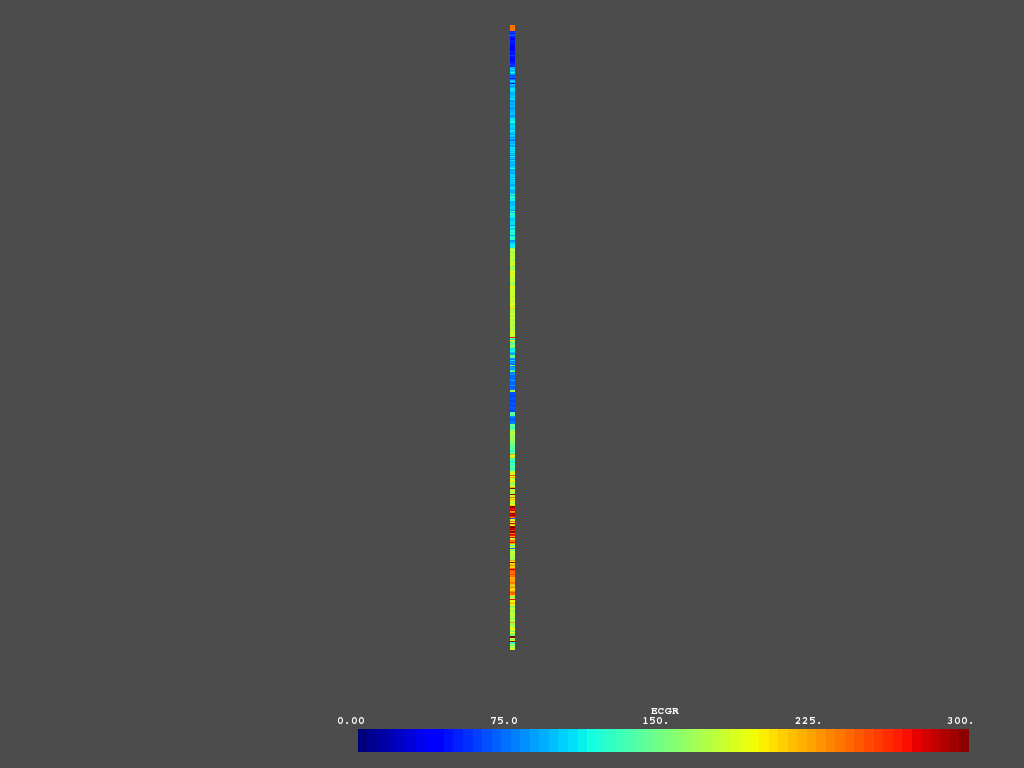

In [6]:
well_poly.set_active_scalar('ECGR')
well_poly.plot(clim=[0,300])

In [7]:
WELLS['well_5832'] = well_poly
gdc19.save_well_db(WELLS)
WELLS

MultiBlock (0x1168eb108)
  N Blocks:	39
  X Bounds:	330059.033, 344017.017
  Y Bounds:	4253546.002, 4270958.977
  Z Bounds:	-2342.568, 2370.739

## RHS-14

Coordinates: x = 335798.986, y = 4264089.99, z = 1690.84658

Lithology: Basin Fill

Depth: 137.5 m

In [ ]:
depth = 137.5
start_x = 335798.986
start_y = 4264089.99
start_z = 1690.84658

WELLS['well_RHS14'] = gdc19.build_well_trajectory(depth, start_x, start_y, start_z)
gdc19.save_well_db(WELLS)

## TPC-12

Coordinates: x = 334826, y = 4262756.046 z = 1661.196616, depth = 150 m

Lithology: Basin Fill

In [ ]:
depth = 150
start_x = 334826
start_y = 4262756.046
start_z = 1661.196616

WELLS['well_TPC12'] = gdc19.build_well_trajectory(depth, start_x, start_y, start_z)
gdc19.save_well_db(WELLS)

## TPC-14

Coordinates: x = 335446.971, y = 4264046.019, z = 1675.199038, depth = 145 m

Lithology: Basin Fill

In [ ]:
depth = 145
start_x = 335446.971
start_y = 4264046.019
start_z = 1675.199038

WELLS['well_TPC14'] = gdc19.build_well_trajectory(depth, start_x, start_y, start_z)
gdc19.save_well_db(WELLS)